=== Reporte de Clasificación - SVM con texto preprocesado ===
                    precision    recall  f1-score   support

  Derecho de autor       1.00      1.00      1.00       137
          Patentes       1.00      1.00      1.00       136
Signos distintivos       1.00      1.00      1.00       100

          accuracy                           1.00       373
         macro avg       1.00      1.00      1.00       373
      weighted avg       1.00      1.00      1.00       373



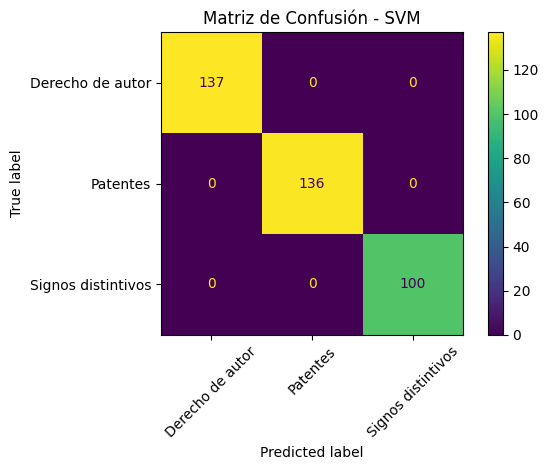

['vectorizer_tfidf.pkl']

In [1]:
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# Cargar modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Función para preprocesar: lematización y eliminación de stopwords/puntuación
def preprocesar(texto):
    doc = nlp(texto.lower())
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Leer archivo CSV y aplicar preprocesamiento
df = pd.read_csv('./activos_pi_2.csv', encoding='latin1')
df["descripcion"] = df["descripcion"].apply(preprocesar)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(df["descripcion"], df["categoria"], test_size=0.2, random_state=42)

# Vectorización TF-IDF con texto limpio
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo SVM
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train_tfidf, y_train)

# Predicción y métricas
y_pred = clf.predict(X_test_tfidf)
print("=== Reporte de Clasificación - SVM con texto preprocesado ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation=45)
plt.title("Matriz de Confusión - SVM")
plt.tight_layout()
plt.show()

# Guardar modelo
joblib.dump(clf, "modelo_svm.pkl")
joblib.dump(vectorizer, "vectorizer_tfidf.pkl")




In [2]:
# Prueba con una nueva descripción
nueva_descripcion = ["un dispositivo mejorado para la comunicación"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: un dispositivo mejorado para la comunicación
Predicción de categoría: Patentes


In [3]:
# Prueba con una nueva descripción
nueva_descripcion = ["logotipo para mi empresa de tecnología"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: logotipo para mi empresa de tecnología
Predicción de categoría: Signos distintivos


In [4]:
# Prueba con una nueva descripción
nueva_descripcion = ["un software de gestión de proyectos"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: un software de gestión de proyectos
Predicción de categoría: Derecho de autor


In [5]:
# Prueba con una nueva descripción
nueva_descripcion = ["patente"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: patente
Predicción de categoría: Patentes
